# <b>Implementing a Simple Neural Network for Handwritten Digit Recognition Utilizing Softmax Activation</b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, linear

In [2]:
X = np.load('X.npy') # 20 by 20 grid of pixels is unrolled into a 400 dimensional vector
y = np.load('y.npy') # 1 dimensional vector y that contains labels

In [3]:
X[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [4]:
y[0]

array([0], dtype=uint8)

In [5]:
X.shape

(5000, 400)

In [6]:
y.shape

(5000, 1)

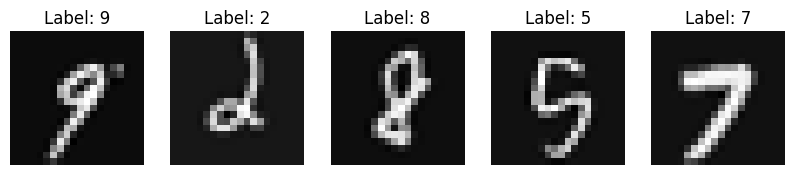

In [7]:
fig, axes =plt.subplots(1,5, figsize=(10,2))

for i in range(5):
    random = np.random.randint(0, 5000)
    axes[i].imshow(X[random].reshape((20, 20)).T, cmap='gray')
    axes[i].set_title(f"Label: {y[random, 0]}")
    axes[i].axis('off')

plt.show()

In [8]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(units=25, activation='relu', name='L1'),
        Dense(units=15, activation='relu', name='L2'),
        Dense(units=10, activation='linear', name='L3')
    ], name='model'
)

In [9]:
model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
[layer1, layer2, layer3] = model.layers

In [11]:
w1, b1 = layer1.get_weights()
print(w1.shape, b1.shape)

(400, 25) (25,)


In [12]:
w2, b2 = layer2.get_weights()
print(w2.shape, b2.shape)

(25, 15) (15,)


In [13]:
w3, b3 = layer3.get_weights()
print(w3.shape, b3.shape)

(15, 10) (10,)


In [14]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

hist = model.fit(X, y, epochs=60)

Epoch 1/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 1.5612
Epoch 2/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 0.5728
Epoch 3/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 0.3887
Epoch 4/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.3186
Epoch 5/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.2779
Epoch 6/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.2496
Epoch 7/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.2277
Epoch 8/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 0.2096
Epoch 9/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.1939
Epoch 10/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 0.1804
Epoch 11/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.1688
Epoch 12/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.1579
Epoch 13/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.1484
Epoch 14/60
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.1396
Epoch 15/60
157/157 ━━━━━━━━━

In [15]:
loss = hist.history["loss"]
epoch = range(1,61)

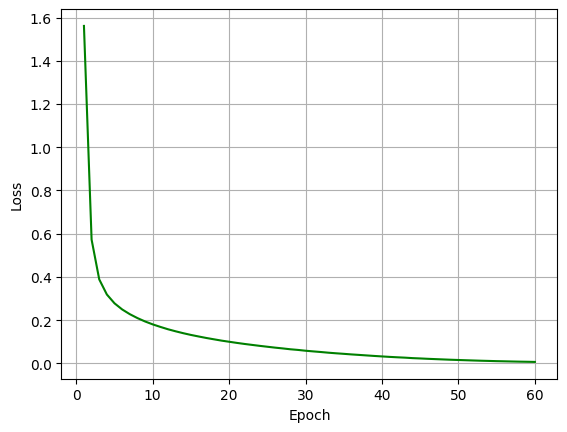

In [16]:
plt.figure()
plt.plot(epoch, loss, color='g')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.show()

In [17]:
prediction = model.predict(X[0].reshape(1,400)) 
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[ 18.83387   , -22.73786   ,  -0.72929484,  -2.150087  ,
        -12.5148535 ,  -1.2447784 , -10.402938  ,  -9.603104  ,
         -3.667482  ,   6.9096494 ]], dtype=float32)

In [18]:
tf.nn.softmax(prediction)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[9.9999332e-01, 8.8231458e-19, 3.1902314e-09, 7.7051349e-10,
        2.4289527e-14, 1.9052468e-09, 2.0073004e-13, 4.4665931e-13,
        1.6896003e-10, 6.6278658e-06]], dtype=float32)>

In [19]:
print(f" Largest Prediction index: {np.argmax(prediction)}")
print(f" True Label: {y[0,0]}")

 Largest Prediction index: 0
 True Label: 0


In [20]:
y_pred = np.argmax(model.predict(X, verbose=0), axis=1)

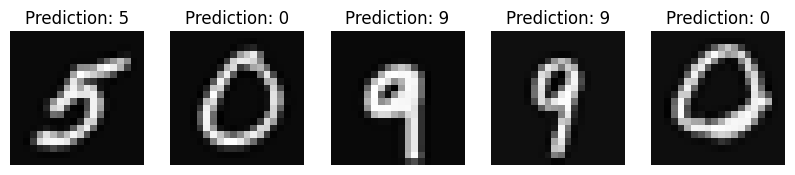

In [21]:
fig, axes =plt.subplots(1,5, figsize=(10,2))

for i in range(5):
    random = np.random.randint(0, 5000)
    axes[i].imshow(X[random].reshape((20, 20)).T, cmap='gray')
    axes[i].set_title(f"Prediction: {y_pred[random]}")
    axes[i].axis('off')

plt.show()